In [1]:
%pip install sklearn
%pip install shapely


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")

# General analysis/plotting packages:
import scipy
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.cluster import KMeans
from statistics import mode 
from scipy.spatial import ConvexHull, distance_matrix

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
from collections import Counter

# Specific t-SNE/visualization packages:
from sklearn.manifold import TSNE
from shapely.geometry import Point, Polygon
from sklearn.cluster import DBSCAN as dbscan


# UMAP shit
# Import UMAP
import umap.umap_ as umap

# Try using SKLEARN's StandardScaler to standardize the data
from sklearn.preprocessing import StandardScaler

In [2]:
param_list = ['# APOGEE_ID_', 'GAIAEDR3_SOURCE_ID', 'GAIAEDR3_PARALLAX', 'GAIAEDR3_PARALLAX_ERROR', 
              'RA', 'DEC', 'GAIAEDR3_PMRA', 'GAIAEDR3_PMRA_ERROR', 'GAIAEDR3_PMDEC', 'GAIAEDR3_PMDEC_ERROR',
              'GAIAEDR3_DR2_RADIAL_VELOCITY', 'GAIAEDR3_DR2_RADIAL_VELOCITY_ERROR', 'SNR', 
              'FE_H', 'FE_H_ERR', 'C_FE', 'C_FE_ERR', 'CI_FE', 'CI_FE_ERR', 'N_FE', 'N_FE_ERR', 'O_FE', 
              'O_FE_ERR', 'MG_FE', 'MG_FE_ERR', 'AL_FE', 'AL_FE_ERR', 'SI_FE', 'SI_FE_ERR', 'P_FE', 'P_FE_ERR',
              'S_FE', 'S_FE_ERR', 'K_FE', 'K_FE_ERR', 'CA_FE', 'CA_FE_ERR', 'TI_FE', 'TI_FE_ERR', 'TIII_FE', 
              'TIII_FE_ERR', 'V_FE', 'V_FE_ERR', 'CR_FE', 'CR_FE_ERR', 'MN_FE', 'MN_FE_ERR', 'CO_FE', 'CO_FE_ERR', 
              'NI_FE', 'NI_FE_ERR']

abundance_labels= ['FE_H', 'C_FE',  'Cl_FE', 'N_FE', 'O_FE', 'MG_FE', 
                    'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 
                    'TI_FE', 'TIII_FE','V_FE', 'CR_FE', 'MN_FE', 'CO_FE','NI_FE']

abundance_index = 13
err_index = 14
fov = 5

# M3 (NGC 5272)
ra_M3 = 205.54842 # [deg]
dec_M3 = 28.37728 # [deg]
dist_M3 = 10180  # [pc]
rt_M3 = 159.0339  # [pc] -- tidal radius @ apogalacticon
rhm_M3 = 6.34  # [pc]
rhm_M3_deg = math.degrees(math.atan(rhm_M3 / dist_M3))  # deg
pmra_M3 = -0.152  # [mas/yr]
pmdec_M3 = -2.670  # [mas/yr]

# M13 (NGC 6205)
ra_M13 = 250.42181
dec_M13 = 36.45986
dist_M13 = 7420
rt_M13 = 8640
rhm_M13 = 5.26
rhm_M13_deg = math.degrees(math.atan(rhm_M13 / dist_M13))  # deg

# M2 (NGC 7089)
ra_M2 = 323.36258
dec_M2 = -0.82325
dist_M2 = 11690
rt_M2 = 10540
rhm_M2 = 4.77
rhm_M2_deg = math.degrees(math.atan(rhm_M2 / dist_M2))  # deg

# M12 (NGC 6218)
ra_M12 = 251.80907
dec_M12 = -1.94853
dist_M12 = 5110
rt_M12 = 4570
rhm_M12 = 4.05
rhm_M12_deg = math.degrees(math.atan(rhm_M12 / dist_M12))  # deg

# M10 (NGC 6254)
ra_M10 = 254.28772
dec_M10 = -4.10031
dist_M10 = 5070
rt_M10 = 4350
rhm_M10 = 4.81
rhm_M10_deg = math.degrees(math.atan(rhm_M10 / dist_M10))  # deg

# NGC 6397
ra_NGC6397 = 265.17538
dec_NGC6397 = -53.67434
dist_NGC6397 = 2480
rt_NGC6397 = 6010
rhm_NGC6397 = 3.90
rhm_NGC6397_deg = math.degrees(math.atan(rhm_NGC6397 / dist_NGC6397))  # deg

# NGC 3201
ra_NGC3201 = 154.40343
dec_NGC3201 = -46.41248
dist_NGC3201 = 4740
rt_NGC3201 = 77.53
rhm_NGC3201 = 6.78
rhm_NGC3201_deg = math.degrees(math.atan(rhm_NGC6397 / dist_NGC6397))  # deg

# 47 tuc
ra_47tuc = 6.02379
dec_47tuc = -72.08131
dist_47tuc = 4520
rt_47tuc = 126.80
rhm_47tuc = 6.30
rhm_47tuc_deg = math.degrees(math.atan(rhm_M10 / dist_M10))  # deg

# M22
ra_M22 = 279.09976
dec_M22 = -23.90475
dist_M22 = 3300
rt_M22 = 77.2
rhm_M22 = 5.29
rhm_M22_deg = math.degrees(math.atan(rhm_M10 / dist_M10))  # deg

# M5
ra_M5 = 229.63841
dec_M5 = 2.08103
dist_M5 = 7480
rt_M5 = 81.73
rhm_M5 = 5.68
rhm_M5_deg = math.degrees(math.atan(rhm_M10 / dist_M10))  # deg

In [9]:
'''Read in APOGEE CSV file'''

apogee_filt = pd.read_csv('data/APOGEEDR17_GAIAEDR3_filter.csv', delimiter=',')
apogee_nofilt = pd.read_csv('data/APOGEEDR17_GAIAEDR3_noflagfilter.csv', delimiter=',')

### Finding stars within a set FOV of the GC centre
def find_cluster_stars(ra, dec, fov, df):
    stars = []
    for count, i in enumerate(df['RA'].values):
        if i >= ra - fov and i <= ra + fov and 
        df['DEC'].values[count] >= dec - fov and 
        df['DEC'].values[count] <= dec + fov:
            stars.append(df.loc[count])
            
   # print(len(stars), 'stars in a 10x10 fov of the GC')

    ra_arr = np.empty(len(stars), dtype=float)
    dec_arr = np.empty(len(stars), dtype=float)
    for count, i in enumerate(stars):
        ra_arr[count] = i['RA']
        dec_arr[count] = i['DEC']

#     plt.figure(figsize=(10,10))
#     plt.plot(ra_arr, dec_arr, 'ok', linestyle='none', markersize=1, label='Stars')
#     plt.plot(ra, dec, 'or', linestyle='none', markersize=5, label='GC centre')
#     plt.xlabel('RA')
#     plt.ylabel('DEC')
#     plt.xlim(ra - fov - 1, ra + fov + 1)
#     plt.ylim(dec - fov - 1, dec + fov + 1)
#     plt.show()
    
    return stars

def split_star_list(stars, parameters):
    param_dict = {}
    for i in parameters:
        if str(i) == '# APOGEE_ID_':
            param_dict[str(i)] = np.empty(len(stars), dtype=object)
        else:
            param_dict[str(i)] = np.empty(len(stars))
    for count,i in enumerate(stars):
        for j in parameters:
            param_dict[str(j)][count] = i[str(j)]
            
    #print(np.shape(param_dict))
    return param_dict

def split_cols(GC_param, parameters):
    cols = []
    for i in range(len(GC_param)):
        cols.append(GC_param[str(parameters[i])])
        
    #print(np.shape(cols))
    return cols

def master_load(ra, dec, fov, dataset, params):
    stars_found = find_cluster_stars(ra, dec, fov, dataset)
    GC_dict = split_star_list(stars_found, params)
    GC_cols = split_cols(GC_dict, param_list)
    
    return [GC_dict, GC_cols]

def pm_filter(GC_dict, GC_cols):
    ### Filter 1: Remove stars that do not have proper motion values. ###
    pm_filter_nan = np.isnan(GC_dict['GAIAEDR3_PMRA'])
    pm_filter = np.where(pm_filter_nan==False)
    data_pmfilter = []
    for i in GC_cols:
        x = np.array(i)[pm_filter]
        data_pmfilter.append(x)
    print("There are {} stars in our sample after the proper motion filtering.".format(len(data_pmfilter[0])))
    
    return data_pmfilter


def chem_filter(data_pmfilter, init_abundance_index):
    ### Filter 2: Remove stars that do not have data for all 19 abundances. ###
    abundance_filter = np.where((data_pmfilter[init_abundance_index] > -9999) & (data_pmfilter[init_abundance_index + 2] > -9999) & (data_pmfilter[init_abundance_index + 4]  > -9999)
                                & (data_pmfilter[init_abundance_index + 6]  > -9999) & (data_pmfilter[ init_abundance_index + 8]  > -9999) & (data_pmfilter[init_abundance_index + 10]  > -9999)
                                & (data_pmfilter[init_abundance_index + 12]  > -9999) & (data_pmfilter[init_abundance_index + 14]  > -9999) & (data_pmfilter[init_abundance_index + 16]  > -9999)
                                & (data_pmfilter[init_abundance_index + 18]  > -9999) & (data_pmfilter[init_abundance_index + 20]  > -9999) & (data_pmfilter[init_abundance_index + 22]  > -9999)
                                & (data_pmfilter[init_abundance_index + 24]  > -9999) & (data_pmfilter[init_abundance_index + 26]  > -9999) & (data_pmfilter[init_abundance_index + 28]  > -9999)
                                & (data_pmfilter[init_abundance_index + 30]  > -9999) & (data_pmfilter[init_abundance_index + 32]  > -9999) & (data_pmfilter[init_abundance_index + 34]  > -9999)
                                & (data_pmfilter[init_abundance_index + 36]  > -9999))

    data_abundancefilter = []
    for i in data_pmfilter:
        y = np.array(i)[abundance_filter]
        data_abundancefilter.append(y)
    print("There are {} stars in our sample after the abundance filtering.".format(len(data_abundancefilter[0])))
    
    return data_abundancefilter

def err_filter(data_pmfilter, init_err_index):
    ### Filter 2: Remove stars that do not have data for all 19 abundances. ###
    err_filter = np.where((data_pmfilter[init_err_index] > -9999) & (data_pmfilter[init_err_index + 2] > -9999) & (data_pmfilter[init_err_index + 4]  > -9999)
                                & (data_pmfilter[init_err_index + 6]  > -9999) & (data_pmfilter[ init_err_index + 8]  > -9999) & (data_pmfilter[init_err_index + 10]  > -9999)
                                & (data_pmfilter[init_err_index + 12]  > -9999) & (data_pmfilter[init_err_index + 14]  > -9999) & (data_pmfilter[init_err_index + 16]  > -9999)
                                & (data_pmfilter[init_err_index + 18]  > -9999) & (data_pmfilter[init_err_index + 20]  > -9999) & (data_pmfilter[init_err_index + 22]  > -9999)
                                & (data_pmfilter[init_err_index + 24]  > -9999) & (data_pmfilter[init_err_index + 26]  > -9999) & (data_pmfilter[init_err_index + 28]  > -9999)
                                & (data_pmfilter[init_err_index + 30]  > -9999) & (data_pmfilter[init_err_index + 32]  > -9999) & (data_pmfilter[init_err_index + 34]  > -9999)
                                & (data_pmfilter[init_err_index + 36]  > -9999))

    data_errfilter = []
    for i in data_pmfilter:
        y = np.array(i)[err_filter]
        data_errfilter.append(y)
    print("There are {} stars in our sample after the abundance filtering.".format(len(data_abundancefilter[0])))
    
    print(np.shape(data_errfilter))
    return data_errfilter

# changed all indices of 0 to 4 (RA) and 23 to 12 (SNR)
def dup_filter(data_abundancefilter):
    d =  Counter(data_abundancefilter[4])
    #print(d)
    duplicates = [k for k, v in d.items() if v > 1]
    a_list = np.array(range(0, len(duplicates)))
    max_SNR_array = []

    for i in a_list:
        indices = np.where(data_abundancefilter[4] == duplicates[i])
        snr_val = data_abundancefilter[12][indices]
        maximum = max(snr_val)
        # 4 is RA, 12 is SNR
        index_maximum = np.where((data_abundancefilter[4] == duplicates[i]) & (data_abundancefilter[12] == maximum))
        #print(index_maximum[4])
        index_maximum = int(index_maximum[4])
        max_SNR_array.append(index_maximum)

    idx_sort = np.argsort(data_abundancefilter[4])
    sorted_ra_array = data_abundancefilter[4][idx_sort]
    vals, idx_start, count = np.unique(sorted_ra_array, return_counts=True, return_index=True)
    res = np.split(idx_sort, idx_start[1:])
    vals = vals[count == 1]
    listtest =  np.array(range(0, len(vals)))

    unique_array = []
    for i in listtest:
        unique_val = np.where(vals[i] == data_abundancefilter[4])
        unique_val = int(unique_val[0])
        unique_array.append(unique_val)

    print("There are {} stars that do not have duplicate spectra.".format(len(unique_array)))
    print("There are {} stars that have multiple spectra, in which we select highest SNR.".format(len(max_SNR_array)))
    
    if len(max_SNR_array) != 0:
        duplicates_filter = np.concatenate((unique_array, max_SNR_array))
        sortedarray = np.sort(duplicates_filter)

        data_duplicatesfilter = []
        for i in data_abundancefilter:
            z = np.array(i)[duplicates_filter]
            data_duplicatesfilter.append(z)

        print("There are {} stars in our sample after removing sources with duplicate spectra.".format(len(data_duplicatesfilter[0])))
    
    else:
        print('There were no duplicate spectra.')
        data_duplicatesfilter = data_abundancefilter
    
    return data_duplicatesfilter

def SNR_filter(data_duplicatesfilter):
    SNR_filter = np.where(data_duplicatesfilter[12] > 50)
    data_snrfilter = []
    for i in data_duplicatesfilter:
        a = np.array(i)[SNR_filter]
        data_snrfilter.append(a)

    print("There are {} stars in our sample after removing sources with low SNR.".format(len(data_snrfilter[0])))

    #print(data_snrfilter[12])
    return data_snrfilter

def master_filter(GC_dict, GC_cols):
    GC_pm_filter = pm_filter(GC_dict, GC_cols)
    GC_abundance_filter = chem_filter(GC_pm_filter, abundance_index)
    #print(np.shape(GC_abundance_filter))

    GC_duplicates_filter = dup_filter(GC_abundance_filter)
    GC_SNR_filter = SNR_filter(GC_duplicates_filter)
    
    print('\nThe final amount of stars in our sample is:', len(GC_SNR_filter[0]))
    return GC_SNR_filter

def control_group(data_filter, ra, dec, rhm_deg):
# Select all the stars within some radius of the cluster:
    def in_circle(center_x, center_y, radius, x, y):
        square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
        return square_dist <= (radius) ** 2

    ra_filtered = data_filter[4]
    dec_filtered = data_filter[5]

    # Select stars within 8 * r,hm (useful for large enough sample of probable cluster members):
    in_halfmass = in_circle(ra, dec, 8*rhm_deg, ra_filtered, dec_filtered)
    indices_control = np.where(in_halfmass==True)

    '''# larger rhm
    in_halfmass_10 = in_circle(ra, dec, 10*rhm_deg, ra_filtered, dec_filtered)
    indices_control_10 = np.where(in_halfmass_10==True)

    # smaller rhm
    in_halfmass_6 = in_circle(ra, dec, 6*rhm_deg, ra_filtered, dec_filtered)
    indices_control_6 = np.where(in_halfmass_6==True)'''

    controlgroup = []
    for i in data_filter:
        b = np.array(i)[indices_control]
        controlgroup.append(b)

    '''controlgroup_10 = []
    for i in data_filter:
        b_10 = np.array(i)[indices_control_10]
        controlgroup_10.append(b_10)

    controlgroup_6 = []
    for i in data_filter:
        b_6 = np.array(i)[indices_control_6]
        controlgroup_6.append(b_6)'''

    # Example control group parameters: 
    ra_control = controlgroup[0]
    dec_control = controlgroup[1]

    print("There are {} stars in our GC control group.".format(len(ra_control)))

    '''print("There are {} stars in our M3 control group w/ size 10.".format(len(controlgroup_10)))

    print("There are {} stars in our M3 control group w/ size 6.".format(len(controlgroup_6)))'''
    
    return [indices_control]

def control_count(data_filter, ra, dec, rhm_deg):
# Select all the stars within some radius of the cluster:
    def in_circle(center_x, center_y, radius, x, y):
        square_dist = (center_x - x) ** 2 + (center_y - y) ** 2
        return square_dist <= (radius) ** 2

    ra_filtered = data_filter[4]
    dec_filtered = data_filter[5]

    # Select stars within 8 * r,hm (useful for large enough sample of probable cluster members):
    in_halfmass = in_circle(ra, dec, 8*rhm_deg, ra_filtered, dec_filtered)
    indices_control = np.where(in_halfmass==True)

    controlgroup = []
    for i in data_filter:
        b = np.array(i)[indices_control]
        controlgroup.append(b)

    # Example control group parameters: 
    ra_control = controlgroup[0]
    dec_control = controlgroup[1]

  #  print("There are {} stars in our GC control group.".format(len(ra_control)))

    return len(ra_control)

def a_near_b(a_points, b_points, min_sep):

    # Calculate the distances between each point and each facet of the hull
    distances = distance_matrix(a_points, b_points)

    # Find the minimum distance from each point to the facets
    min_distances = distances.min(axis=1)
    
    # Check which points are inside the hull
    near_points = (min_distances < min_sep).tolist()
    
    indices = np.where(near_points)
    count = np.shape(np.where(near_points)[0])[0]
    return indices, count

def count_matches(array1, array2):
    # Convert the arrays to sets
    set1 = set(array1)
    set2 = set(array2)

    # Find the intersection of the sets and return its length
    matches = len(set1.intersection(set2))

    return matches


In [16]:
def tSNE_alg(data_filter, index, indices_control):
    
    FE_H_filtered, C_FE_filtered, CI_FE_filtered = data_filter[index], data_filter[index+2], data_filter[index+4]
    N_FE_filtered, O_FE_filtered, MG_FE_filtered = data_filter[index+6], data_filter[index+8], data_filter[index+10]
    AL_FE_filtered, SI_FE_filtered, P_FE_filtered = data_filter[index+12], data_filter[index+14], data_filter[index+16]
    S_FE_filtered, K_FE_filtered, CA_FE_filtered = data_filter[index+18], data_filter[index+20], data_filter[index+22]
    TI_FE_filtered, TIII_FE_filtered, V_FE_filtered = data_filter[index+24], data_filter[index+26], data_filter[index+28]
    CR_FE_filtered, MN_FE_filtered, CO_FE_filtered, NI_FE_filtered = data_filter[index+30], data_filter[index+32], data_filter[index+34], data_filter[index+36]
    RV_filtered  = data_filter[10]

    all_array = np.array([FE_H_filtered, C_FE_filtered, CI_FE_filtered, N_FE_filtered, O_FE_filtered, MG_FE_filtered,
                          AL_FE_filtered, SI_FE_filtered, P_FE_filtered, S_FE_filtered, K_FE_filtered, CA_FE_filtered, 
                          TI_FE_filtered, TIII_FE_filtered, V_FE_filtered, CR_FE_filtered, MN_FE_filtered, CO_FE_filtered,
                           NI_FE_filtered])
    
    pretsne_array = all_array
    
    standardized_array = []
    mean=np.nanmean(pretsne_array,axis=1);sigma=np.nanstd(pretsne_array,axis=1)
    for i in range(len(mean)):
        standardized_array.append((pretsne_array[i]-mean[i])/sigma[i])
    
    standardized_array_transpose = np.transpose(standardized_array)

    # Run t-SNE on the transposed array:
    tsne_init = TSNE(n_components=2, perplexity = 100)
    tsne_2d = tsne_init.fit_transform(standardized_array_transpose)

    # Get t-SNE outputs for complete filtered dataset:
    t_SNE_dimX = tsne_2d[:, 0]
    t_SNE_dimY = tsne_2d[:, 1]
    tsne_XY = np.append(t_SNE_dimX, t_SNE_dimY).reshape(2,len(t_SNE_dimX)).T

    # Get t-SNE outputs for control group:
    tsne_dimX_control = t_SNE_dimX[indices_control]
    tsne_dimY_control = t_SNE_dimY[indices_control]
    tsne_XY_control = np.append(tsne_dimX_control, tsne_dimY_control).reshape(2,len(tsne_dimX_control[0])).T
        
    #Get index of main control star grouping
    clustering_control = dbscan(eps=5, min_samples=5).fit(tsne_XY_control)    
    control_labels = clustering_control.labels_ 
    label_of_max_control_group = Counter(control_labels).most_common(1)[0][0]
    index_of_controls_wrt_controls = np.where(control_labels == label_of_max_control_group)
    index_of_controls_wrt_all_stars = indices_control[0][0][index_of_controls_wrt_controls]
    
    ref_points = tsne_XY_control[index_of_controls_wrt_controls]
    star_indices_true, star_count_true = a_near_b(tsne_XY, ref_points,9)
       
    print(len(t_SNE_dimX))   
    print('number of cluster stars found with all 19 abundances =', star_count_true)

    fig, ax = plt.subplots(figsize=(8,8))
    ax.scatter(tsne_dimX_control , tsne_dimY_control, s=45, edgecolor='k', c='hotpink', label='Control Group',alpha=.3)
    ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c='blue', label='APOGEE DR17 stars')
    ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
    ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='both', which='minor', labelsize=16)
    plt.title('all 19 abundances')
    #ax.legend(fontsize=8)
    plt.show()
    

################

    abundance_labels= ['FE_H', 'C_FE',  'Cl_FE']#, 'N_FE', 'O_FE', 'MG_FE', 
                    'AL_FE', 'SI_FE', 'P_FE', 'S_FE', 'K_FE', 'CA_FE', 
                    'TI_FE', 'TIII_FE','V_FE', 'CR_FE', 'MN_FE', 'CO_FE','NI_FE']

    n_cluster_stars_array=[]
    matches_array=[]
    misses_array=[]
    for i in tqdm(range(0,len(all_array))):

        if i != 0 and i != 1:

            pretsne_array = np.array([all_array[0], all_array[1], all_array[i]])

            standardized_array = []
            mean=np.nanmean(pretsne_array,axis=1);sigma=np.nanstd(pretsne_array,axis=1)
            for j in range(len(mean)):
                standardized_array.append((pretsne_array[j]-mean[j])/sigma[j])

            standardized_array_transpose = np.transpose(standardized_array)

            # Run t-SNE on the transposed array:
            tsne_init = TSNE(n_components=2)
            tsne_2d = tsne_init.fit_transform(standardized_array_transpose)

            # Get t-SNE outputs for complete filtered dataset:
            t_SNE_dimX = tsne_2d[:, 0]
            t_SNE_dimY = tsne_2d[:, 1]
            tsne_XY = np.append(t_SNE_dimX, t_SNE_dimY).reshape(2,len(t_SNE_dimX)).T

            # Get t-SNE outputs for control group:
            tsne_dimX_control = t_SNE_dimX[indices_control]
            tsne_dimY_control = t_SNE_dimY[indices_control]
            tsne_XY_control = np.append(tsne_dimX_control, tsne_dimY_control).reshape(2,len(tsne_dimX_control)).T

            print(abundance_labels[i])
            fig, ax = plt.subplots(figsize=(4,4))
            ax.scatter(tsne_dimX_control , tsne_dimY_control, s=45, edgecolor='k', c='hotpink', label='Control Group',alpha=.5)
            ax.scatter(t_SNE_dimX, t_SNE_dimY, s=1, c='blue', label='APOGEE DR17 stars')
            ax.set_xlabel("t-SNE X-Dimension", fontsize=16)
            ax.set_ylabel("t-SNE Y-Dimension", fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=16)
            ax.tick_params(axis='both', which='minor', labelsize=16)

            ax.legend(fontsize=8)
            plt.show()


            #Get index of main control star grouping
            clustering_control = dbscan(eps=5, min_samples=5).fit(tsne_XY_control)    
            control_labels = clustering_control.labels_ 
            label_of_max_control_group =  Counter(control_labels).most_common(1)[0][0]
            index_of_controls_wrt_controls = np.where(control_labels == label_of_max_control_group)
            index_of_controls_wrt_all_stars = indices_control[0][index_of_controls_wrt_controls]

            ref_points = tsne_XY_control[index_of_controls_wrt_controls]
            star_indices, star_count = a_near_b(tsne_XY, ref_points,4)

            correct_matches = count_matches(star_indices[0], star_indices_true[0])
            incorrect_matches = len(star_indices[0]) - correct_matches
            print('identified', correct_matches, 'ETs in common with result from all 19 abundances')
            print('misidentified', incorrect_matches, 'ETs not in result with all 19 abundances')

            n_cluster_stars_array.append(star_count)
            matches_array.append(correct_matches)
            misses_array.append(incorrect_matches)
            
            
    return [t_SNE_dimX, t_SNE_dimY, tsne_dimX_control[0], tsne_dimY_control[0], star_count_true, n_cluster_stars_array, matches_array, misses_array]


In [12]:
def master_tSNE(data_filter, index, indices_control):
    standardize = standardize_data(data_filter, index)
    #print(np.shape(standardize))
    return tSNE_alg(standardize, indices_control)

def master_tSNE_func(ra, dec, rhm_deg, abundance_index, fov, dataset, params):
    # loading
    GC_dict, GC_cols = master_load(ra, dec, fov, dataset, params)
    
    # filtering
    GC_filter_data = master_filter(GC_dict, GC_cols)
    
    # control grouping
    GC_indices_control = control_group(GC_filter_data, ra, dec, rhm_deg)
    
    # tSNEing
    tSNE_X, tSNE_Y, tSNE_control_X, tSNE_control_Y, GC_n_cluster_stars_true, GC_n_cluster_stars_array, GC_matches, GC_misses= tSNE_alg(GC_filter_data, abundance_index, GC_indices_control)
    
    # UMAPing
#UMAP_X, UMAP_Y, UMAP_control_X, UMAP_control_Y = master_UMAP(GC_filter_data, abundance_index, GC_indices_control)
    
    print('Done!')
    return [tSNE_X, tSNE_Y, tSNE_control_X, tSNE_control_Y,  GC_n_cluster_stars_true, GC_n_cluster_stars_array, GC_matches, GC_misses] #UMAP_X, UMAP_Y, UMAP_control_X, UMAP_control_Y]


There are 894 stars in our sample after the proper motion filtering.
There are 894 stars in our sample after the abundance filtering.
There are 894 stars that do not have duplicate spectra.
There are 0 stars that have multiple spectra, in which we select highest SNR.
There were no duplicate spectra.
There are 894 stars in our sample after removing sources with low SNR.

The final amount of stars in our sample is: 894
There are 60 stars in our GC control group.
894
number of cluster stars found with all 19 abundances = 240


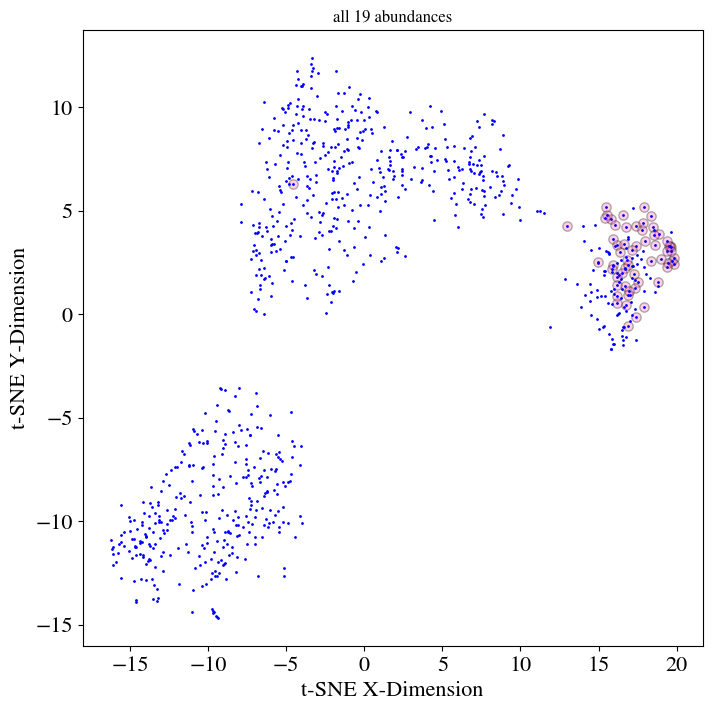

  0%|          | 0/19 [00:00<?, ?it/s]

Pairs with FE_H
Cl_FE FE_H


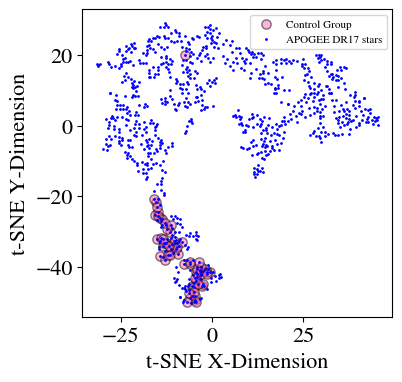

 16%|█▌        | 3/19 [00:07<00:42,  2.66s/it]

identified 149 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
N_FE FE_H


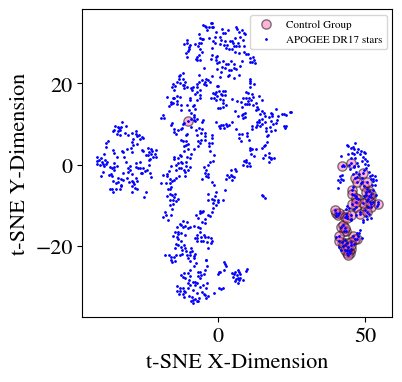

 21%|██        | 4/19 [00:15<01:03,  4.24s/it]

identified 143 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
O_FE FE_H


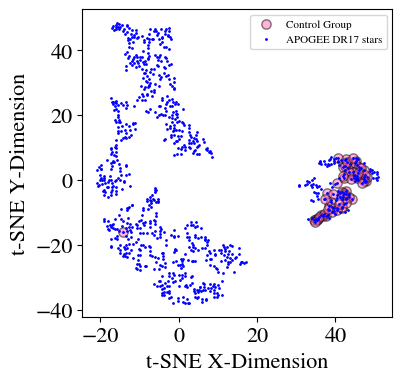

 26%|██▋       | 5/19 [00:22<01:08,  4.86s/it]

identified 144 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
MG_FE FE_H


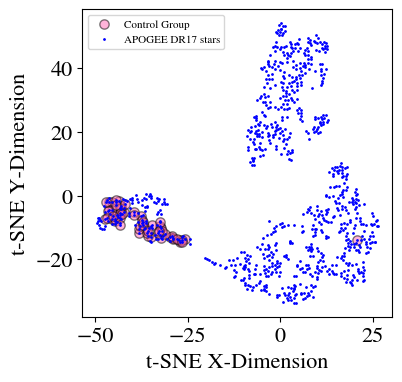

 32%|███▏      | 6/19 [00:28<01:08,  5.30s/it]

identified 133 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
AL_FE FE_H


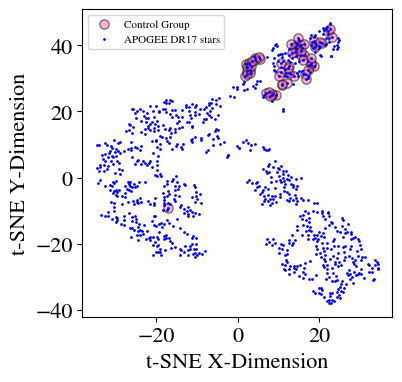

 37%|███▋      | 7/19 [00:33<01:03,  5.28s/it]

identified 130 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
SI_FE FE_H


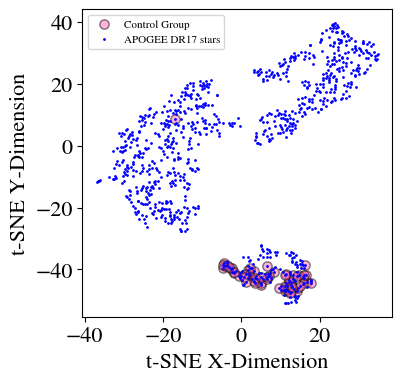

 42%|████▏     | 8/19 [00:40<01:03,  5.78s/it]

identified 139 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
P_FE FE_H


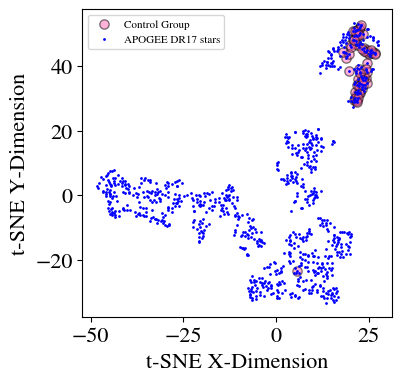

 47%|████▋     | 9/19 [00:47<01:00,  6.06s/it]

identified 144 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
S_FE FE_H


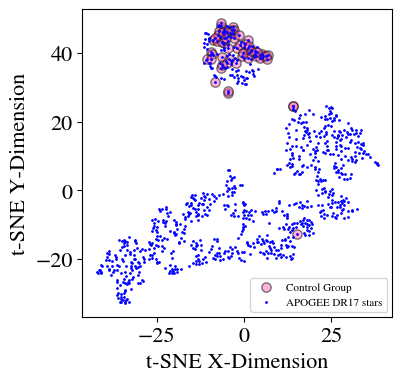

 53%|█████▎    | 10/19 [00:54<00:56,  6.33s/it]

identified 133 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
K_FE FE_H


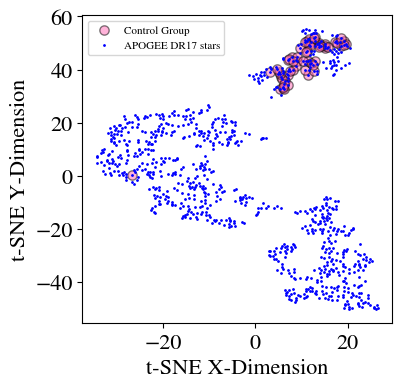

 58%|█████▊    | 11/19 [01:01<00:51,  6.48s/it]

identified 145 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
CA_FE FE_H


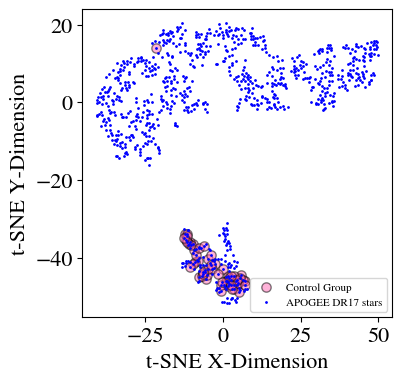

 63%|██████▎   | 12/19 [01:07<00:43,  6.28s/it]

identified 138 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
TI_FE FE_H


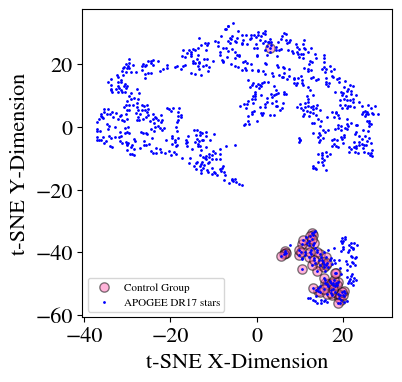

 68%|██████▊   | 13/19 [01:13<00:38,  6.47s/it]

identified 130 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
TIII_FE FE_H


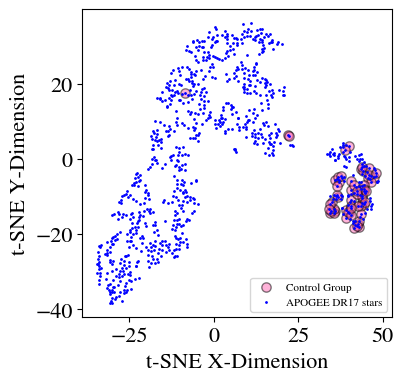

 74%|███████▎  | 14/19 [01:20<00:32,  6.54s/it]

identified 124 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
V_FE FE_H


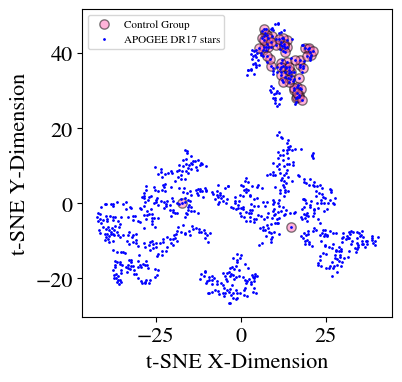

 79%|███████▉  | 15/19 [01:26<00:24,  6.21s/it]

identified 135 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
CR_FE FE_H


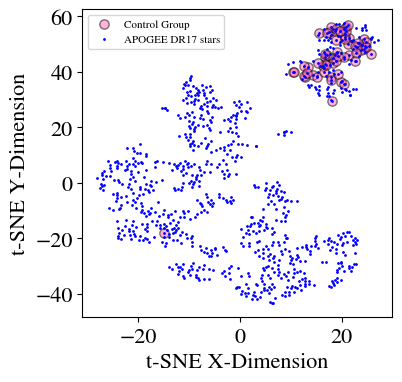

 84%|████████▍ | 16/19 [01:32<00:18,  6.16s/it]

identified 147 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
MN_FE FE_H


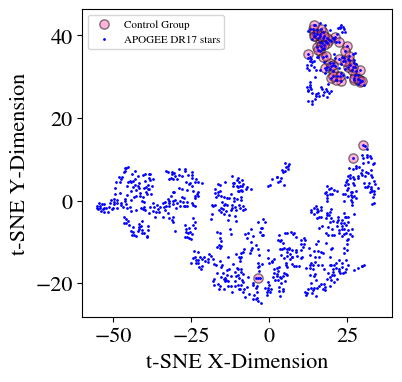

 89%|████████▉ | 17/19 [01:37<00:11,  5.97s/it]

identified 136 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
CO_FE FE_H


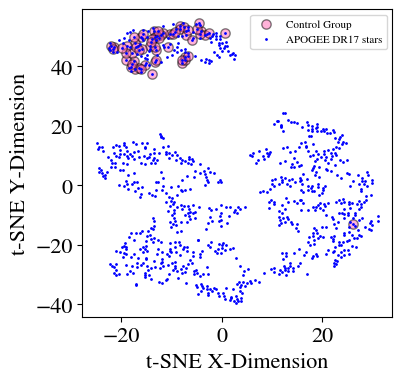

 95%|█████████▍| 18/19 [01:44<00:06,  6.35s/it]

identified 139 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
NI_FE FE_H


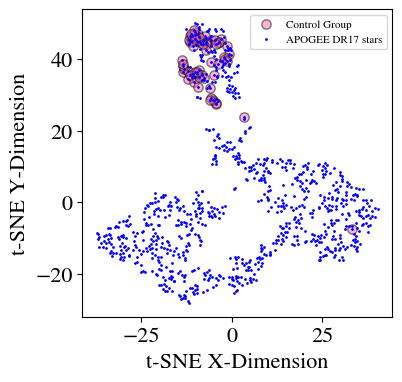

100%|██████████| 19/19 [01:52<00:00,  5.94s/it]

identified 136 ETs in common with result from all 19 abundances
misidentified 0 ETs not in result with all 19 abundances
Done!


In [38]:
#M3 
M3_tSNE_X, M3_tSNE_Y, M3_tSNE_control_X, M3_tSNE_control_Y, M3_n_cluster_stars_true, M3_n_cluster_stars_array, M3_matches, M3_misses= \
master_tSNE_func(ra_M3, dec_M3, rhm_M3_deg, abundance_index, fov, apogee_filt, param_list)

In [18]:
M3_matches, M3_misses

([[317,
   344,
   298,
   278,
   293,
   288,
   294,
   311,
   303,
   292,
   289,
   308,
   296,
   309,
   328,
   330,
   319]],
 [[7, 14, 3, 1, 5, 6, 5, 6, 4, 7, 6, 4, 3, 5, 1, 2, 3]])

In [21]:
abundance_labels[2:]

['Cl_FE',
 'N_FE',
 'O_FE',
 'MG_FE',
 'AL_FE',
 'SI_FE',
 'P_FE',
 'S_FE',
 'K_FE',
 'CA_FE',
 'TI_FE',
 'TIII_FE',
 'V_FE',
 'CR_FE',
 'MN_FE',
 'CO_FE',
 'NI_FE']

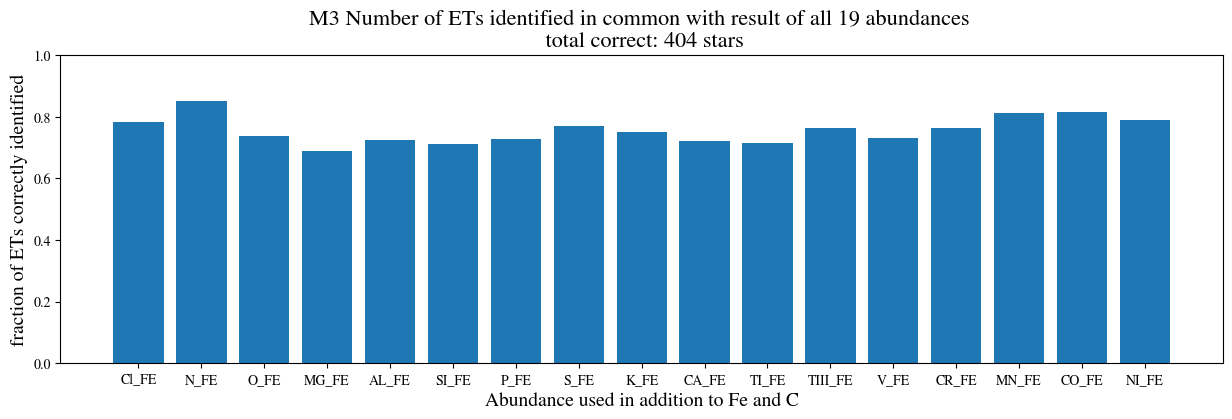

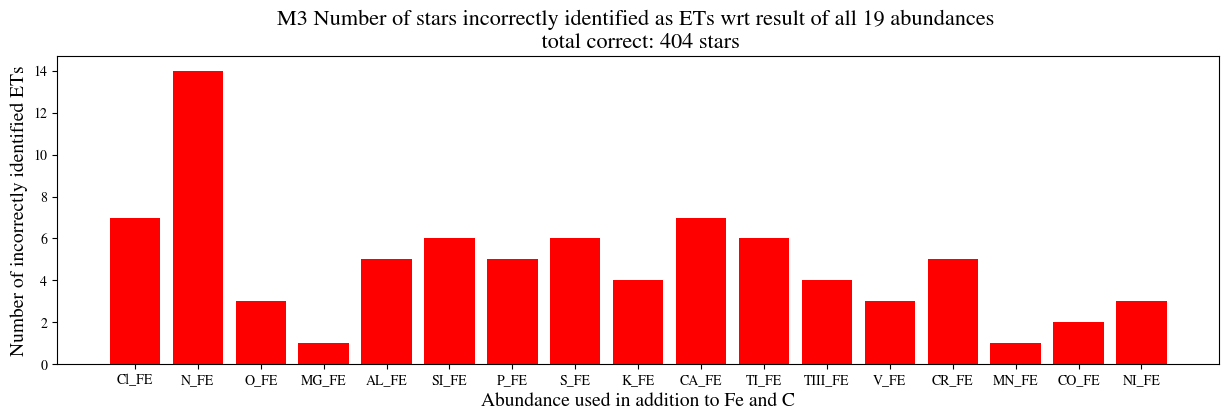

In [37]:
plt.figure(figsize=(15,4))
plt.bar(abundance_labels[2:], np.array(M3_matches[0])/404)
plt.ylabel('fraction of ETs correctly identified',fontsize=14)
plt.xlabel('Abundance used in addition to Fe and C',fontsize=14)
plt.title('M3 Number of ETs identified in common with result of all 19 abundances \n total correct: 404 stars', fontsize=16)
plt.ylim(0,1)
plt.show()

plt.figure(figsize=(15,4))
plt.bar(abundance_labels[2:], M3_misses[0], color='red')
plt.ylabel('Number of incorrectly identified ETs',fontsize=14)
plt.xlabel('Abundance used in addition to Fe and C',fontsize=14)
plt.title('M3 Number of stars incorrectly identified as ETs wrt result of all 19 abundances \n total correct: 404 stars', fontsize=16)
plt.show()

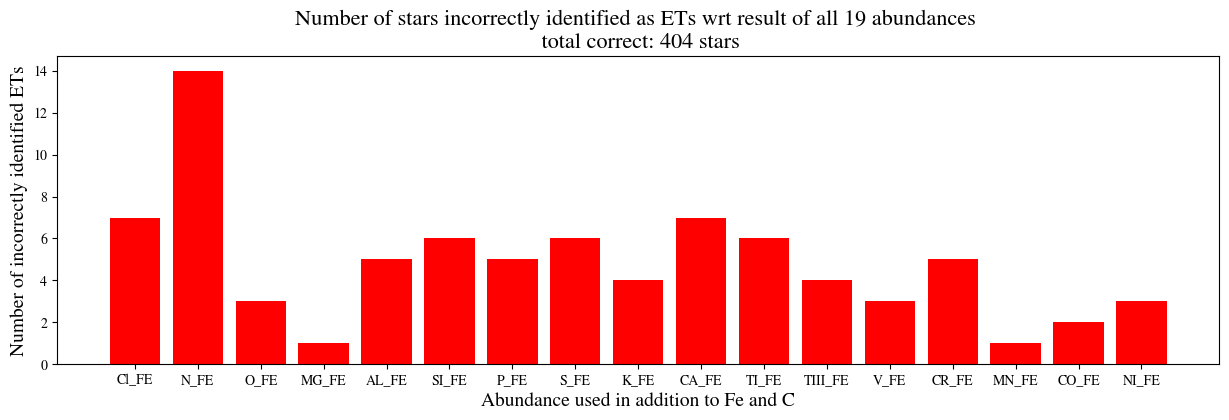

In [ ]:
_47tuc_tSNE_X, _47tuc_tSNE_Y, _47tuc_tSNE_control_X, _47tuc_tSNE_control_Y, _47tuc_n_cluster_stars_true, _47tuc_n_cluster_stars_array, _47tuc_matches, _47tuc_misses= \
master_tSNE_func(ra_47tuc, dec_47tuc, rhm_47tuc_deg, abundance_index, fov, apogee_nofilt, param_list)


# To do
Cross check with Steffani's paper on the number of stars left over after each filter
Fe+C + X plot